## Name: Oni Segun Yemi

# Project: No-Show Medical Appointment 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#reference">Reference</a></li>
</ul>

<a id='intro'></a>
## Introduction

The Brazilian public health system, termed in Portuguese as SUS for Unified Health System, is one of the world's largest with government spending amounting to almost 9% of GDP. Its operation, however, is not uniform, and residents in different parts of the country have differing ideas of quality <a href="#[1]">[1]</a>.
The no-show appointments dataset will be used in this project, which contains information from 100k medical visits in Brazil and is focused on the subject of whether or not patients show up for their appointments, as well as a collection of patient attributes in each columns.

The dataset used in this project is sourced or downloaded from kaggle <a href="#[3]">[3]</a>. 

**Setting up the import statements for all the packages that will used in this project**

In [2]:
# Pyhton libraries for data analysis
import pandas as pd
import numpy as np

#Packeges for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [1]:
# Importing the dataset

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

# checking the head of the dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Research Questions

Based on the dataset information and its attributes, the following questions will be examined:
> 1. What is the average waiting days between the scheduling date and the appointment date?
2. Does recieveing or non receiving sms has effect on no-show for medical appointment?
3. Does patients with serious illness and access to scholarphip show up?

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The output obatianed showed that there are 11057 observations in the dataset, and 14 atributes. The attributes description are exaplained briefly below.
* PatientID: This represent the patient identification number and it is stored as float
*  AppointmentID: his represent the patients appointment identification number and it is stored as string
* Gender: This the gender attribute of the patients and it is stored as string
* ScheduledDay: This represent the date that each patients booked for medical check up
* AppointmentDay: This represent the day and time each patients was supposed to have an appointment
* Age: This represent the Age of the patients at the time of medical appointment 
* Neighbourhood: This represent the area each patients are residing within the region
* Scholarship: This represent information about if a patient was sponspored for an appointment or otherwise
* Hipertension: This is information about the health status of a patient as either hipertensive or not
* Diabetes: This is information about the health status of a patient as either diabetes or not
* Alchoholism: This is information about the drinking behaviour of the patient as either an alcholic or not
* Handicap: This is the Physical or bodily information about the patient as either handicap or whole
* SMS_recieved: This represent the booking status of the patient via a text message 
* No_show: This the class or response variable which shows if a patient either shows up for medical appointment or not

It can also be observed from the structure of each variables in the dataset that some varibales were not rightly coded or assigned by python which can lead to a potential problem. for example, variables like ScheduledDay and AppointmentDay are supposed to be date time but are stored as string. 

### Checking for missing values 

In [93]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

The above output shows that there are no missing values in the dataset

### Cheking all the numeric attributes 

In [94]:
## Using the descibe method
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


It can be observed that the age attribute has a wrong data value of -1, age should be a postive integer. Variables like PatientId and AppointmentId does not make any sense numerically. The two variables type can be changed to string datatype. Also, the handicap variable is meant to be a value between 0 and 1, where 0 represent false and 1 represent true but from the output it ranges from 1 to 4. 

### Checking all the categorical variable

In [95]:
## Gathering all the categorical variables into a variable name
df_cat = df[['Gender','Neighbourhood','No-show']]
df_cat.head()

,Gender,Neighbourhood,No-show
0,F,JARDIM DA PENHA,No
1,M,JARDIM DA PENHA,No
2,F,MATA DA PRAIA,No
3,F,PONTAL DE CAMBURI,No
4,F,JARDIM DA PENHA,No


### Using the value counts and unique function to describe the catgeroical variables

In [96]:
## For Gender
df_cat['Gender'].nunique()

2

It can be observed from the output that the female patients are more that the male patients. The female size is almost times two of the male group

In [82]:
## for No-show
df_cat['No-show'].nunique()

2

It can be observed from the output that the number of patients that actually show up for their medical appointment are significantly lower than the patients who default. Almost times 4 of the size of patients that show up for appointment are defaulters group (i.e don't show up)

In [24]:
df_cat['Neighbourhood'].nunique()

81

The nunique fucntion was used to get the total number of unique neighborhood in the dataset. It can be observed that the dataset contains a total of 81 unique neighbourhood


### Data Cleaning

### Cleaning the age variable 

In [26]:
##check where the age data values is non-positve interger using the query function
df.query('Age<0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659430e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


The incorrect age value is at row 99832, the entire row will be drooped from the dataset

In [97]:
##Using the drop function to drop the affected row
df.drop(99832, inplace =True)

##double checking te age column
df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

### cleaning the patientid and appointmentid column

In [98]:
##Writting a function to convert from a string to numeric
def converter(num):
    return str(num)

In [99]:
## Applying the function to the patientID and apointmentID
df['PatientId'] = df['PatientId'].apply(converter)
df['AppointmentID']=df['AppointmentID'].apply(converter)


### Cleaning the Handicap variable

In [100]:
##writing a function to convert all number greater than 1 to 1 
def convert2(num):
    if num>1:
        return 1
    else:
        return 0 
    return num

In [101]:
df['Handcap']= df['Handcap'].apply(convert2)

In [102]:
### Checking the numerical variables 
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.001800,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.042394,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### cleaning the ScheduledDay and AppointmentDay ie. converting both to a proper data type

In [159]:
##converting both Schedule day and appointed day to datetime using the pandas daytime function

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [160]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872500000000.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558998000000000.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262960000000.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951000000.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841190000000.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis


In [127]:
## Explaring the neighborhood vaiable 
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

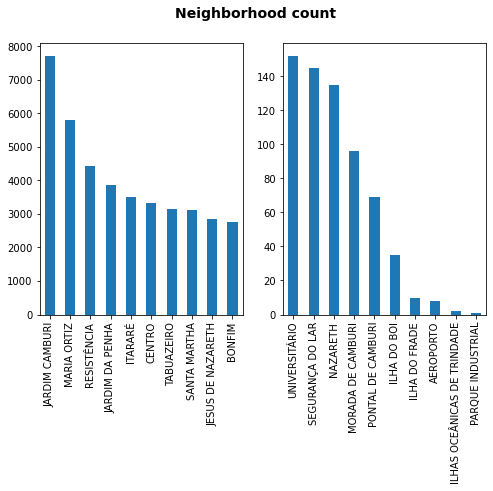

In [313]:
##creating a bar plot for the first 10 and last 10 neighbourhood baseed on frequncy count
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.suptitle('Neighborhood count', fontsize=14, fontweight='bold')
df['Neighbourhood'].value_counts().head(10).plot(kind='bar')
plt.subplot(1,2,2)
df['Neighbourhood'].value_counts().tail(10).plot(kind='bar');

It can be observed that JARDIM CAMBURI had the highest frequency of coocurence for appointment while PARQUE INDUSTRIAL represent the minority. The bar chart shows that the first 10 region registered up to 30k appointments.

### Exploring the No-shows variable

In [137]:
df['No-show'].value_counts()

No     88207
Yes    22319
Name: No-show, dtype: int64

Text(0.5, 1.0, 'No Show Distribution')

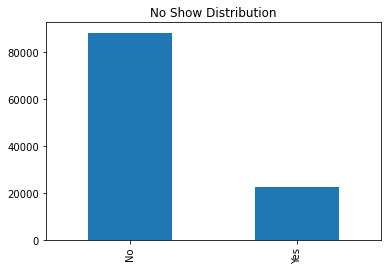

In [314]:
df['No-show'].value_counts().plot(kind='bar')
plt.title('No Show Distribution')

It can be observed from the output that the number of patients that actually show up for their medical appointment are significantly lower than the patients who default. Almost times 4 of the size of patients that show up for appointment are defaulters group (i.e don't show up).

### Exploring the age column

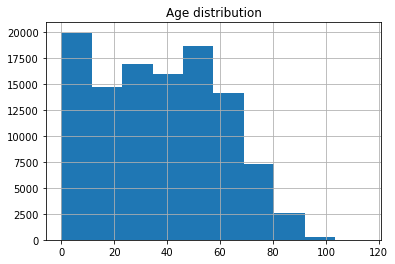

In [316]:
df['Age'].hist()
plt.title('Age distribution');

In [153]:
df_age_NoShow= df['Age'][df['No-show']=='No']
df_age_Show = df['Age'][df['No-show']=='Yes']

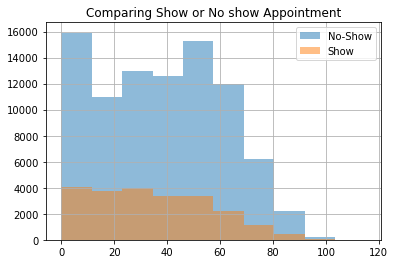

In [318]:
df_age_NoShow.hist(label= 'No-Show', alpha = 0.5)
df_age_Show.hist(label ='Show', alpha = 0.5)
plt.legend();
plt.title('Comparing Show or No show Appointment');

The histogram plot shows the age distribution of the patient based on show and no show for apointment. It can be observed that the distrubution of patients that does'nt show up for appointment is higher than that of patients that indeed show up. Majority of the pateints for both groups are in ages relatively young (between 0 to 40 years) 

### Research Question 1 :What is the average waiting days between the scheduling date and the appointment date?

#### Creating a new column for Schdule time and apointment time 

In [171]:
##Using list comprehsion to create 2 new columns in the dataframe

df['scheduled date'] = [i.date() for i in df['ScheduledDay']]
df['Appointment date'] = [i.date() for i in df['AppointmentDay']]
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,scheduled date,Appointment date
0,29872500000000.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29
1,558998000000000.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29
2,4262960000000.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29
3,867951000000.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,2016-04-29
4,8841190000000.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,2016-04-29


#### To find the Average waiting days. The scheduling tdate will be subtracted from the appointment date 

In [177]:
##Subtracting the schedule time from the appointment time and creating a new column
df['Waiting days'] = df['Appointment date'] - df['scheduled date']
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,scheduled date,Appointment date,Waiting days
110522,2572130000000.0,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,2016-05-03,2016-06-07,35 days
110523,3596270000000.0,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,2016-05-03,2016-06-07,35 days
110524,15576600000000.0,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,2016-04-27,2016-06-07,41 days
110525,92134900000000.0,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,2016-04-27,2016-06-07,41 days
110526,377512000000000.0,5629448,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,0,0,0,0,1,No,2016-04-27,2016-06-07,41 days


### Obtaining the average waiting days 

In [197]:
## Using the string method extract all to extract the numeric value from number of days in waiting days
df['number_of_days']=df['Waiting days'].astype('str').str.extractall('(\d+)').unstack().astype(int)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,scheduled date,Appointment date,Waiting days,n,number_of_days
0,29872500000000.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29,0 days,0,0
1,558998000000000.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0 days,0,0
2,4262960000000.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0 days,0,0
3,867951000000.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0 days,0,0
4,8841190000000.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,2016-04-29,0 days,0,0


In [201]:
###To find teh average waiting days 

df['number_of_days'].describe()

count    110526.000000
mean         10.183975
std          15.254914
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: number_of_days, dtype: float64

It can be observed that the average waiting time for pateints between the day of schedule or booking and day of apointment is 10. Interestingly, some patients have waited for almost 180 days before apointment based on the maximum value. This can be further explored.

<AxesSubplot:title={'center':'Distribution plot for number of waiting days'}, xlabel='days'>

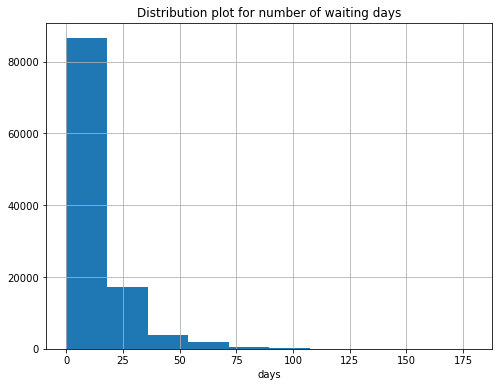

In [209]:
##Visualizing the average waiting days
plt.figure(figsize=(8,6))
plt.title('Distribution plot for number of waiting days')
plt.xlabel('days')
df['number_of_days'].hist()

### To Explore if the number of waiting days has effect on show and no show for apointments

In [211]:
##partioning the number of waithing days based on show and no show data
df_wait_NoShow= df['number_of_days'][df['No-show']=='No']
df_wait_Show = df['number_of_days'][df['No-show']=='Yes']

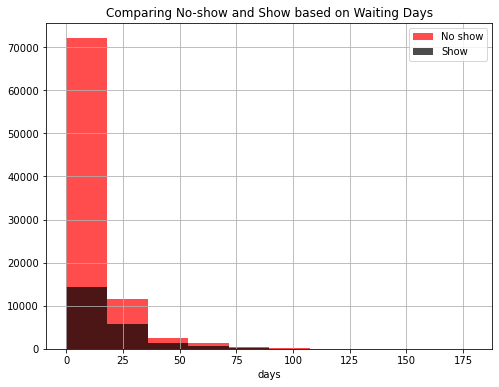

In [319]:
plt.figure(figsize=(8,6))
df_wait_NoShow.hist(label = 'No show', alpha =0.7, color = 'red')
df_wait_Show.hist(label='Show', alpha =0.7, color = 'black')
plt.title('Comparing No-show and Show based on Waiting Days')
plt.xlabel('days')
plt.legend();

Looking at tail of the distribution plot, the no-show group had longer waiting days than the show group. This could mean that the higher the waiting days the lower the show-up

### Research Question 2 : Does recieveing or non receiving sms has effect on no-show for medical appointment

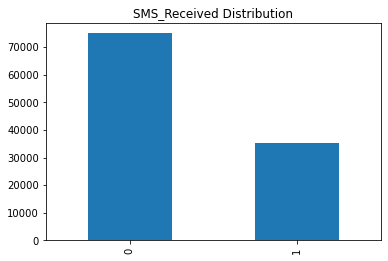

In [321]:
df['SMS_received'].value_counts().plot(kind='bar')
plt.title('SMS_Received Distribution');

The bar plot showed the frequency distribution of patients that claimed to recieve an sms as regards to their medical appointment. The result shows that there is a class imbalance, the yes to sms reciept group is lower compared to no reciept of sms group. There are more than 70k patients that claimed they don't recieve sms, while, slightly above 30k affirmed recieving of sms.

In [233]:
no_show_sms= df['SMS_received'][df['No-show']=='Yes']
show_sms= df['SMS_received'][df['No-show']=='No']

In [234]:
no_show_sms.value_counts()

0    12535
1     9784
Name: SMS_received, dtype: int64

In [235]:
show_sms.value_counts()

0    62509
1    25698
Name: SMS_received, dtype: int64

In answering research question 2, a cross-tabulation of patients that claimed to recieve sms and those that stated otherwise was paired with their show up records or information. from the cross-tabulation results, it can be observed that 12,535 patients with no sms did not show up for appointment while 25,698 patients with sms did showed up. Also, 9,784 patients that received sms did not show up for medical appointment while 62,509 with no sms showed up for their medical appointment.  Although, from the exploratory analysis, it was observed that there is a class imbalance in the dataset for both sms and show up record, this may have some effect on the results of analysis. However, the results literally showed that majority of patients with no record of sms actually showed up for their appointment. This could mean or imply that sending of sms by the clinic for appointment reminder might not really have effect on whether patients will show up or not.

### visualizing the cross tabulation of sms Vs. no-show

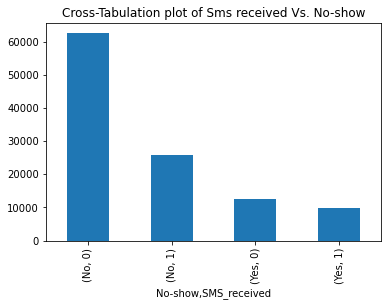

In [244]:
df[['No-show','SMS_received']].value_counts().plot(kind='bar')
plt.title('Cross-Tabulation plot of Sms received Vs. No-show');

### Research Question 3 : Does patients with serious illness and access to scholarphip show up?

In [309]:
## Selecting variables of interest 
df_new = df[['Scholarship','Hipertension','Diabetes',
                    'Alcoholism','Handcap','No-show']]
df_new

,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No-show
0,0,1,0,0,0,No
1,0,0,0,0,0,No
2,0,0,0,0,0,No
3,0,0,0,0,0,No
4,0,1,1,0,0,No
...,...,...,...,...,...,...
110522,0,0,0,0,0,No
110523,0,0,0,0,0,No
110524,0,0,0,0,0,No
110525,0,0,0,0,0,No


### Performing a groupby analysis on the slected information based on scholarship and No Show

In [310]:
byillness = df_new.groupby(by=['Scholarship','No-show'])

In [311]:
byillness.sum().transpose()

Scholarship       0           1     
No-show          No   Yes    No  Yes
Hipertension  16517  3400  1512  372
Diabetes       6067  1307   446  123
Alcoholism     2304   528   379  149
Handcap         141    40    17    1

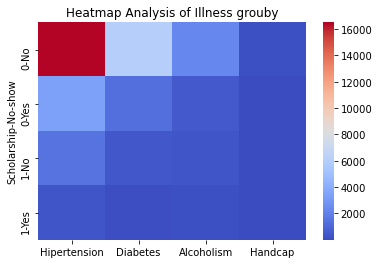

In [323]:
sns.heatmap(byillness.sum(), cmap='coolwarm')
plt.title('Heatmap Analysis of Illness grouby');

The groupby analysis shows that a total number of 16517 patient with hypertension illness with no scholarship did not show up while 3400 with the same illness but no scholarship showed up. 1512 patient hypetension and Scholarship did not show up while 372 hypertensive patients with scholarship showed up. Majority of diabetes patients with no scholarship did not show and also those with scholarship that refused to show up are more than those who did. For alcoholism group, 379 patients with scholorship did not show up while 149 actually showed up. Just one person with scholarship in the handicap group actually showed up while 17 with scholarship did not show up. The analysis of results showed that majority of the patients suffering from one serious illness or the other does not have access to scholarships and they don't usually show up for medical appointments. 

<a id='conclusions'></a>
## Conclusions



The goal of this project was to investigate a medical appointment no-shows dataset, which contains more than **100.000** appointments with around **35%** of patients failing to show up. As a result, the data research described in this notebook served to reveal some insights into the likely causes of this appointment's cancellation. It is crucial to note, however, that given the data presented and the methodologies used, no statistical validity or causal relationships can be established. On the other hand, the information gleaned from this study can be used to guide and inform more in-depth investigation into the subject, in order to confirm the causes of appointment cancellations and develop appropraite solutions.

## Conclusion based on Research Question

**1. What is the average waiting days between the scheduling date and the appointment date?**

Analysis based on the research question1 revealed that the avearge waiting days for a patient between scheduling date and appointed date is 10 days, and pateint can wait as long as 179 days before been access to doctors or nurses. It was establish based on exploration that the longer a patient is delayed the higher chances of not showing up.

**2. Does recieveing or non receiving sms has effect on no-show for medical appointment?**

Analysis based on the research question2 revealed that the sending of sms does not really have effect on whether a patient will show up or not, though not proven statiscally. The analysis showed that patients without sms showed up compared to other group.

**3. Does patients with serious illness and access to scholarphip show up?**

The analysis performed to answer this question suggested that majority of patients with one illness or the other have low or no access to scholarship and they did not show up or default medical appointment time. 


## Limitations

* There was little or no sufficient information on how the data was acquired
* There are large inconsistencies with information regarding the neighborhood
* Most of the categorical variables in the dataset are imbalance 
* The score of the project is limited to exploration.

<a id='references'></a>
## References

<a id='[1]'></a>[1] Wikipedia contributors. Brazil. Wikipedia, The Free Encyclopedia. February 9, 2018, Available at: https://en.wikipedia.org/w/index.php?title=Brazil&oldid=824851232. Accessed in May 29, 2022.


<a id='[2]'></a>[2] Stack Overflow. Plot pandas DataFrame as bar and line on the same one chart. Available at https://stackoverflow.com/questions/23482201/plot-pandas-dataframe-as-bar-and-line-on-the-same-one-chart. Accessed in May 30, 2022.

<a id='[3]'></a>[3] Kaggle. *Medical Appointment No Shows*. Reviewed dataset. Available at: https://www.kaggle.com/joniarroba/noshowappointments. Accessed in May 29, 2022.
